In [7]:
import pandas as pd
import music_recommend

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#emotion = { "joy":0.2, "excitement":0.5, "gratitude":0.7 }
emotion = { "grief":0.2, "curiosity":0.5, "disapproval":0.7 }

music_recommend.get_music(emotion, None, None, True)

,FILE,ENG,KOR,score,GENRE,TEMPO,MOOD,INSTRUMENT
75,76. Sarabande_ 사라방드_국악.mp3,Sarabande,사라방드,4.1330,국악,조금느리게,SAD,장구(JANGGU)+해금(HAEGEUM)+피아노(PIANO)+대금(DAEGEUM)
82,83. Moonlight_ 월광_국악.mp3,Moonlight,월광,4.1180,국악,조금느리게,SAD,피아노(PIANO)+대금(DAEGEUM)
23,24. Minuet In G Major BWV Anh. II 114_ 미뉴에트 사장...,Minuet In G Major BWV Anh. II 114,미뉴에트 사장조 BWV Anh. II 114,4.0730,funk,조금빠르게,POWERFUL,콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
78,79. Solveig's Song_ 솔베이지의 노래_국악.mp3,Solveig's Song,솔베이지의 노래,4.0680,국악,보통빠르기로,SAD,피아노(PIANO)+대금(DAEGEUM)+스트링앙상블(STRING ENSEMBLE)
95,"96. Invention No.4 in D minor, BWV 775_ 인벤션 4번...","Invention No.4 in D minor, BWV 775",인벤션 4번 라단조,3.9920,string,보통빠르기로,SAD,관악기(BRASS&WOODWIND)+스트링(STRING)
70,71. Consolation_ 위안_uptempo swing.mp3,Consolation,위안,3.9830,uptempo swing,매우빠르게,POWERFUL,콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
61,62. blumenlied (Flower Song)_ 꽃노래_uptempo swin...,blumenlied (Flower Song),꽃노래,3.9830,uptempo swing,매우빠르게,POWERFUL,콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
28,29. Salut D'amour In E Major Op.12_ 사랑의 인사 마장조...,Salut D'amour In E Major Op.12,사랑의 인사 마장조 작품번호 12,3.9830,uptempo swing,매우빠르게,POWERFUL,콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
16,17. Nocturne Op.9-2_ 녹턴 작품번호 9-2_funk.mp3,Nocturne Op.9-2,녹턴 작품번호 9-2,3.9830,funk,느리게,WHITE,콘트라베이스(CONTRABASS)+피아노(PIANO)+기타(GUITAR)+드럼(DRUM)
45,46. Solveing's song_ 솔베이그의 노래_swing.mp3,Solveing's song,솔베이그의 노래,3.9680,swing,보통빠르기로,SAD,콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)


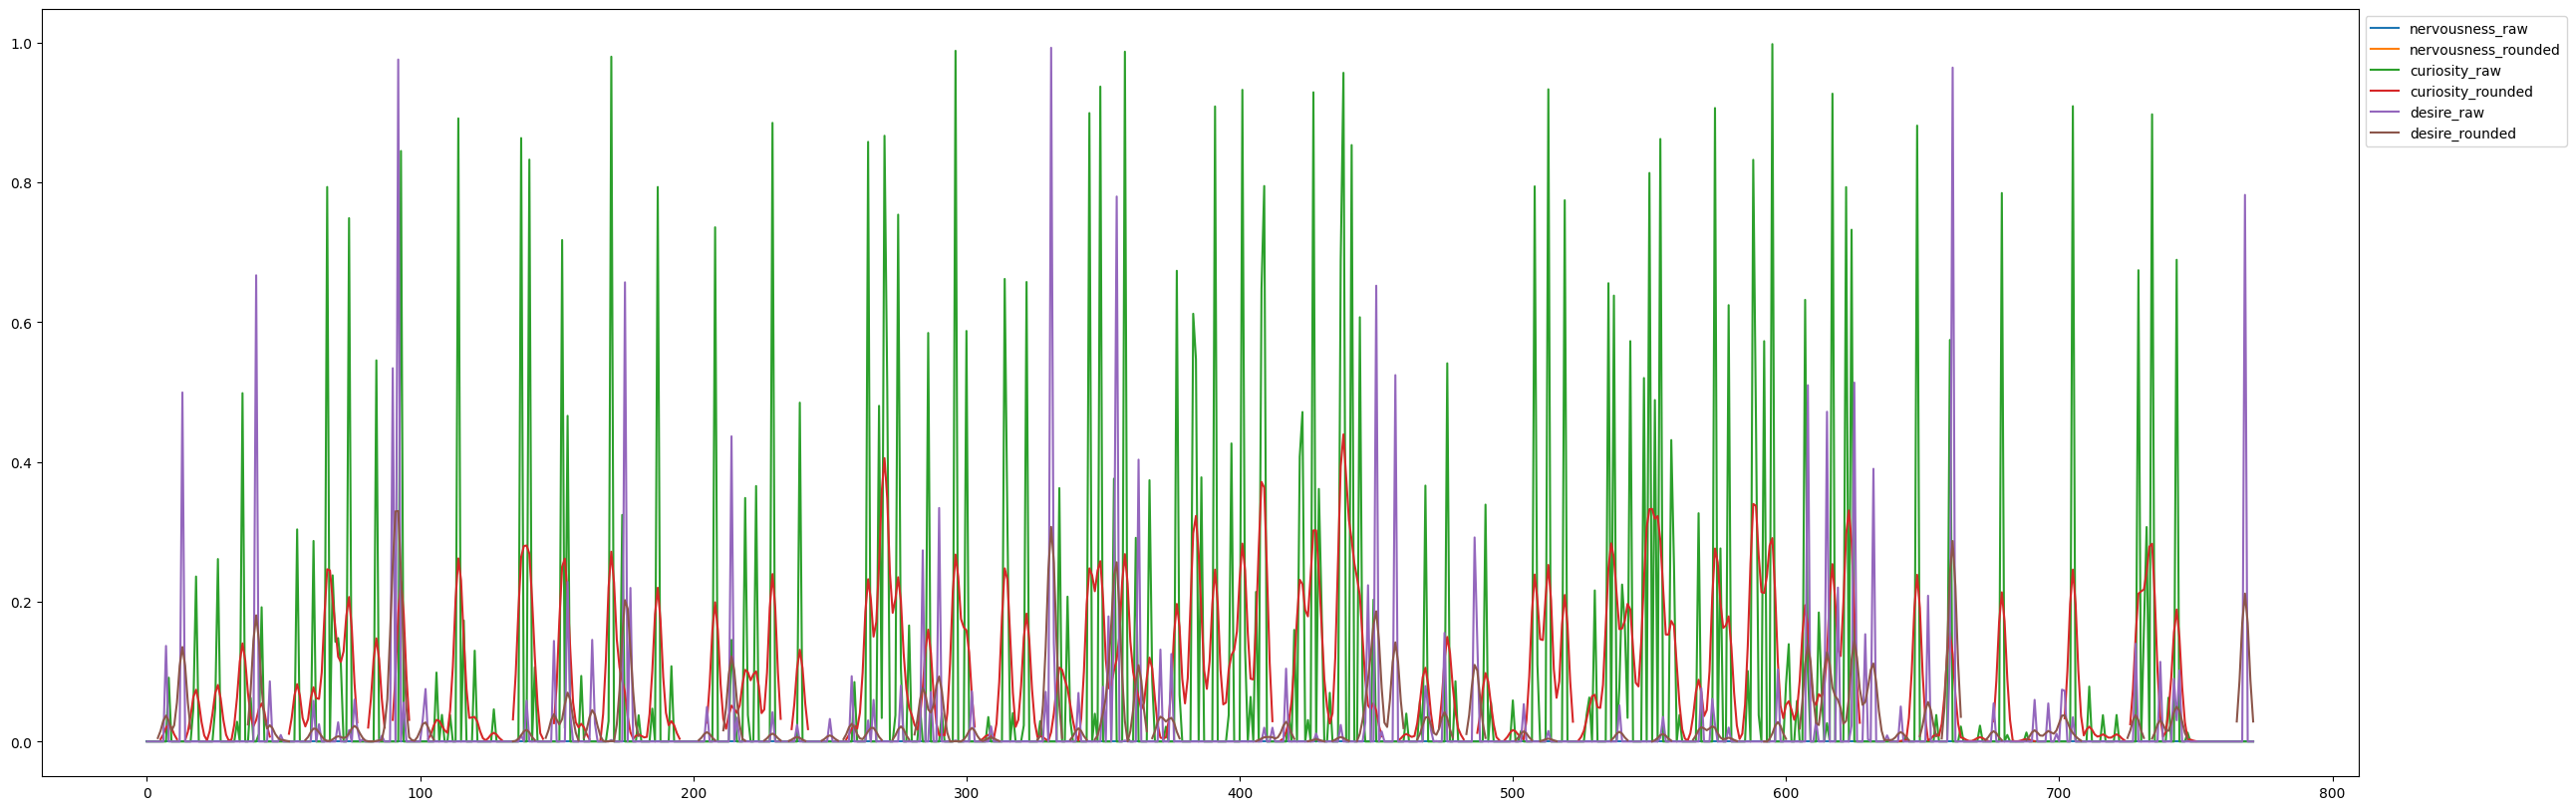

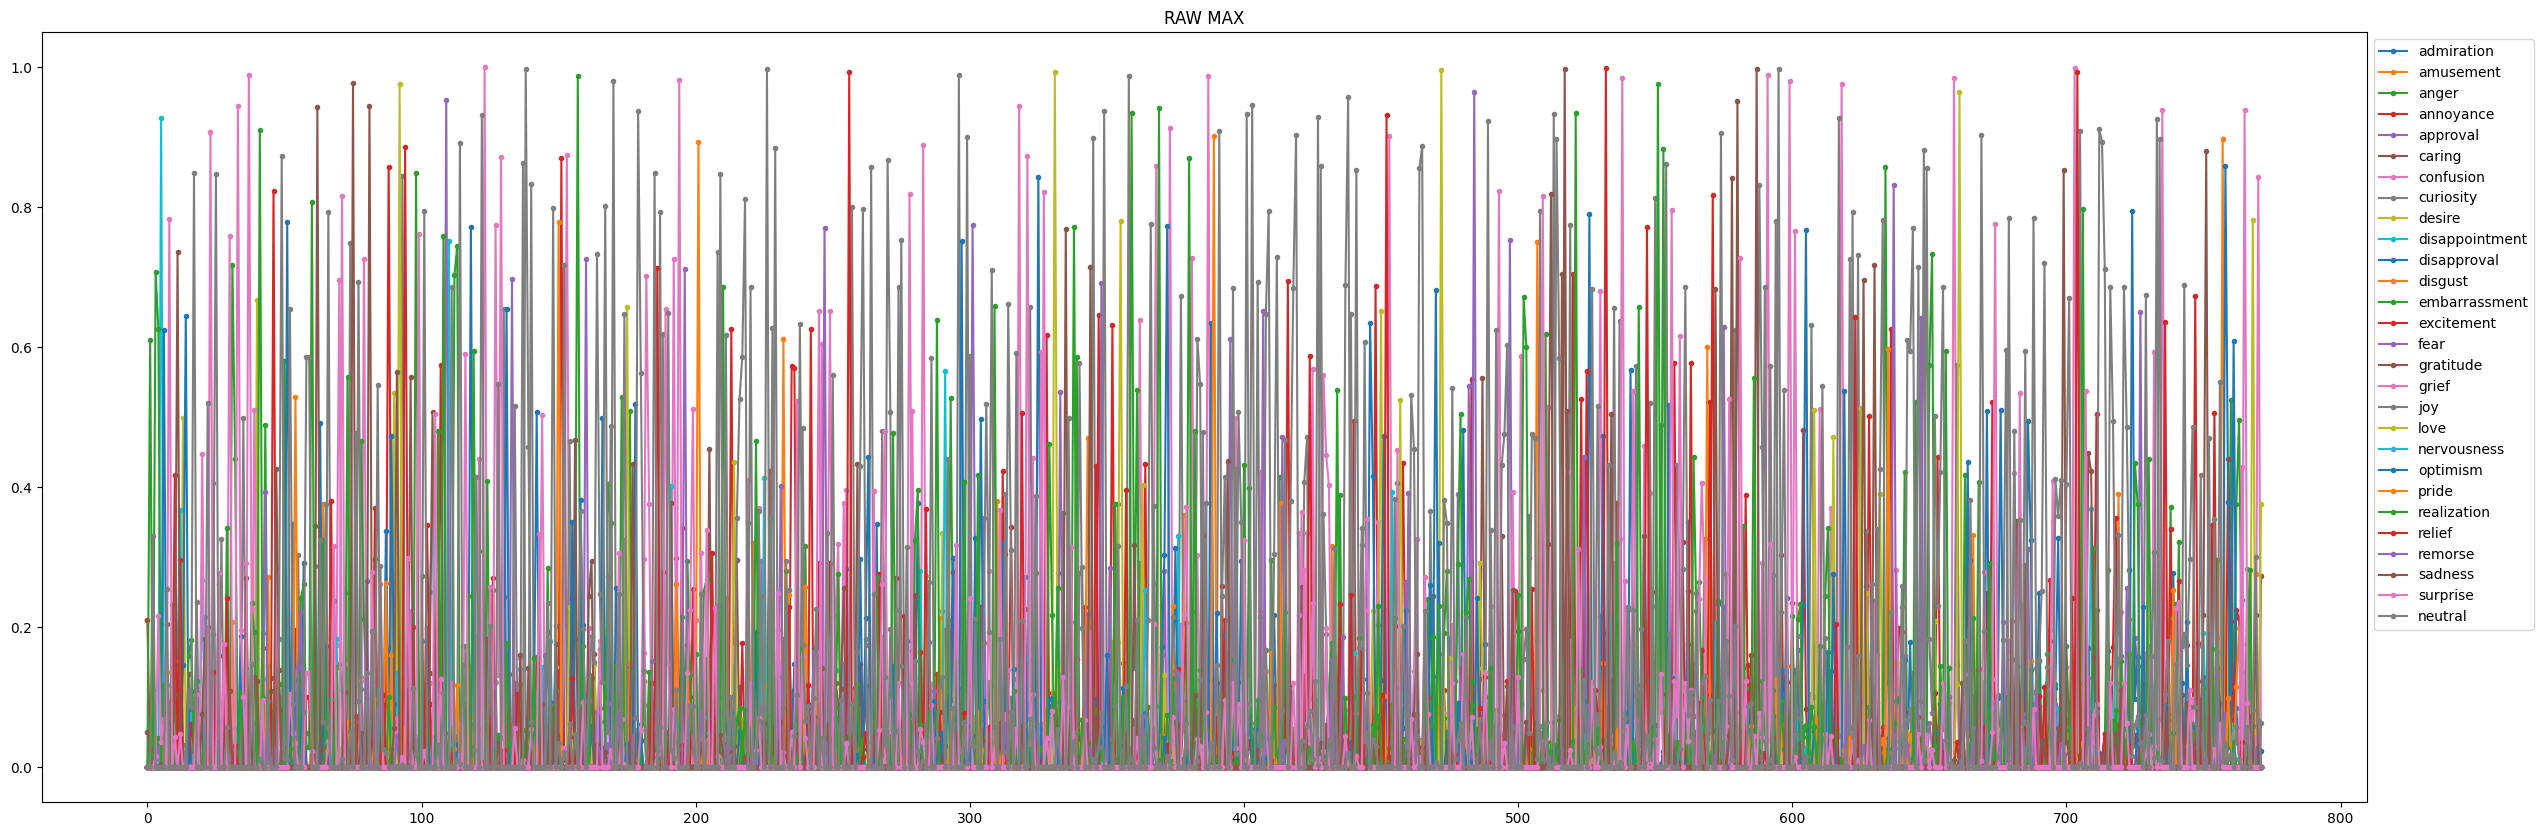

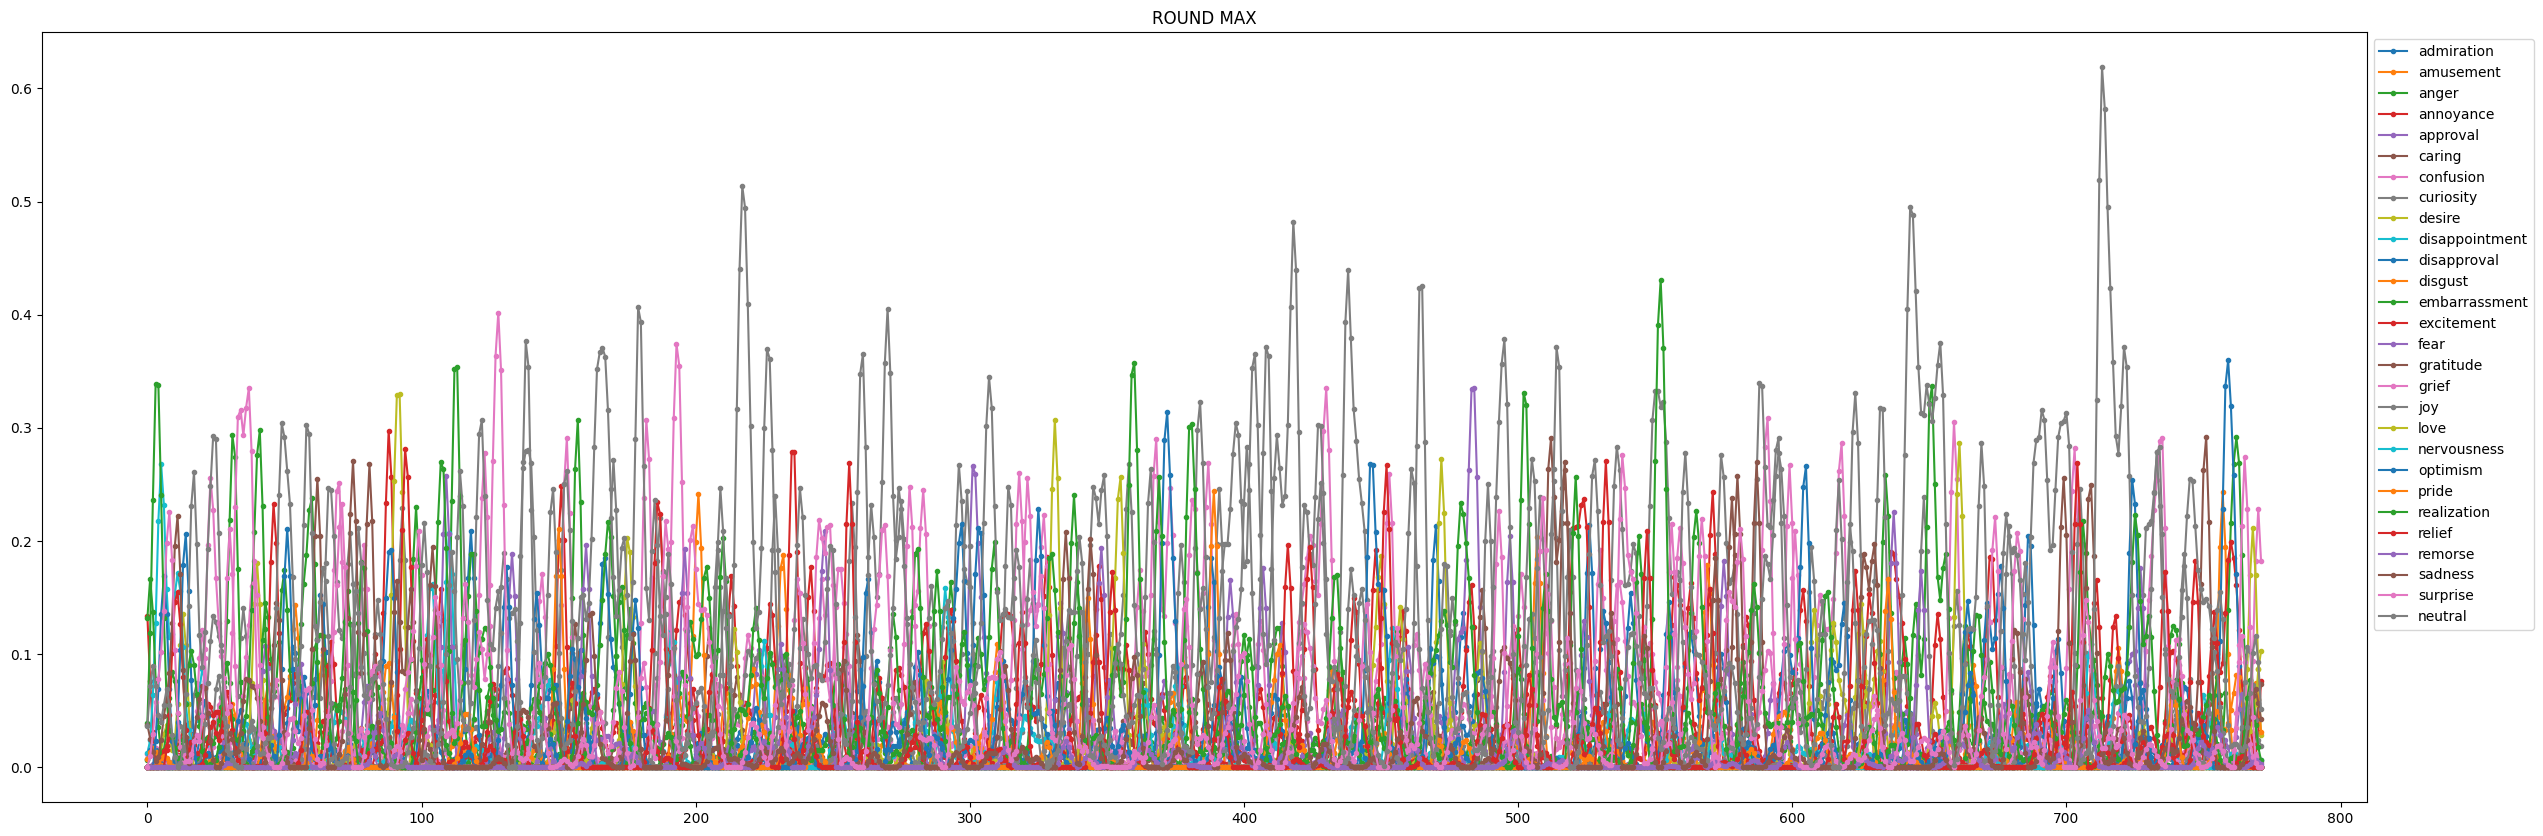

사라방드 / 국악 / 조금느리게 / SAD / 장구(JANGGU)+해금(HAEGEUM)+피아노(PIANO)+대금(DAEGEUM)
{'annoyance': 0.1334372166934294, 'confusion': 0.011819012533461671, 'disappointment': 0.012295864219776697, 'embarrassment': 0.1321316904532584, 'realization': 0.039521980438394166, 'sadness': 0.03758406127684626, 'neutral': 0.03680286382732575} 75
사라방드 / 국악 / 조금느리게 / SAD / 장구(JANGGU)+해금(HAEGEUM)+피아노(PIANO)+대금(DAEGEUM)
{'anger': 0.012263775431522728, 'annoyance': 0.07658732287582604, 'confusion': 0.017208257712001164, 'disappointment': 0.023949073305045265, 'disapproval': 0.0148335636924019, 'disgust': 0.013572648530256833, 'embarrassment': 0.16653931922122328, 'realization': 0.11861795897296708, 'sadness': 0.025395166224086347, 'neutral': 0.07168219068478214} 75
사라방드 / 국악 / 조금느리게 / SAD / 장구(JANGGU)+해금(HAEGEUM)+피아노(PIANO)+대금(DAEGEUM)
{'anger': 0.015315602077347777, 'annoyance': 0.0314591128636519, 'confusion': 0.01882229245569987, 'disappointment': 0.0639047024600328, 'disapproval': 0.01852487924052053, 'disgust':

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
import music_recommend

EMOTION = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# WINDOW SHAPE FUNCTIONS
def normal_dist(x, deviation):
    y = np.exp(-0.5*(x/deviation)**2)
    return y / sum(y)
def rectangle(x):
    return np.ones(shape=np.shape(x)) / len(x)
def pyramid(x):
    y = np.abs(x)
    y = 1 - y / np.max(y)
    return y / np.sum(y)

def get_raw_values(file_name:str):
    with open(file_name, "r", encoding='utf-8') as f:
        jsn = json.load(f)
    data = [i['emotion'] for i in jsn['data']]    
    result = {}

    for E in EMOTION:    
        result[E] = [e[E] if E in e else 0 for e in data]
    max_values = [max(e,key=e.get) for e in data]
    return result, max_values

def round_values(values:dict):
    HALF_SIZE = 3
    shift = np.arange(-HALF_SIZE, HALF_SIZE+1)
    window = normal_dist(shift, 1.5)
    length = len(values[EMOTION[0]])

    result = {}
    for E in EMOTION:
        origin = values[E]
        temp = np.zeros(length)
        for x, y in zip(shift, window):
            v1 =  np.roll(origin, x)
            if x < 0:
                v1[x:] = v1[x]
            elif x > 0:
                v1[:x] = v1[x]
            temp += v1 * y    
        result[E] = temp
    max_values = [max([E for E in EMOTION],key=lambda E : result[E][i]) for i in range(length)]
    return result, max_values


CRITERIA = 0.05
def to_json(values:dict):
    length = len(values[EMOTION[0]])
    result = [None] * length
    for i in range(length):
        temp = {}
        for E in EMOTION:
            v = values[E][i]
            if v > CRITERIA:
                temp[E] = v
        result[i] = temp
    return result

file = 'raw/1.json'
raw, raw_max = get_raw_values(file)
rounded, rounded_max = round_values(raw)

plt.figure(figsize=(30,10))
for e in ['nervousness', 'curiosity', 'desire']:
    plt.plot(raw[e], '-', label = e + '_raw')
    l = [x if x != 0 else np.nan for x in rounded[e]]
    plt.plot(l, '-', label = e + '_rounded')
    plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(30,10))
plt.title('RAW MAX')
for E in EMOTION:
    ##l = [e.get[EMO] for e in emotions]
    #l = [val if E == raw_max[idx] else np.nan for idx, val in enumerate(raw[E])]
    l = raw[E]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(30,10))
plt.title('ROUND MAX')
for E in EMOTION:
    #l = [val if E == rounded_max[idx] else np.nan for idx, val in enumerate(rounded[E])]
    l = rounded[E]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

for emotion in to_json(rounded):
    print(emotion, music_recommend.get_music(emotion, None, None))